In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading the dataset
df=pd.read_csv("AB_NYC_2019_1.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
#Find % of null values of each column of dataset
null_var=df.isnull().sum()/df.shape[0]*100

In [6]:
print(null_var)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.drop(["id","host_id"],axis = 1,inplace =True)

In [9]:
#df["reviews_per_month"].fillna(value=df["reviews_per_month"].mean(),inplace=True)

In [10]:
#df["last_review"]=pd.to_datetime(df["last_review"])

In [11]:
#df["last_review"].mean()

In [12]:
#df["last_review"].fillna(value=df["last_review"].mean(),inplace=True)

In [13]:
df.fillna({"name":"Noname"},inplace=True)

In [14]:
df.fillna({"host_name":"Noname"},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
name                              48895 non-null object
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 5.2+ MB


In [16]:
df.isnull().sum()

name                                  0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
#Check correlation -coeficient between independent variable and dependent
#variable with the help of corr() : inbuilt function


In [19]:
df.corr() 

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


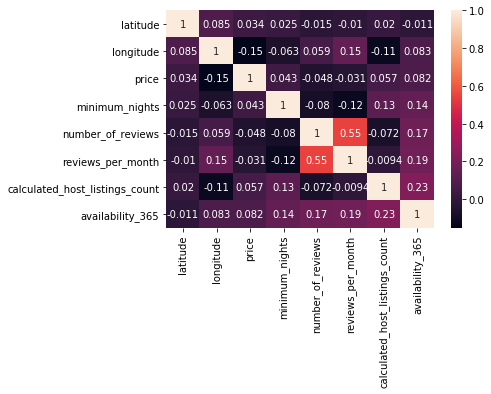

In [20]:
#we visualise 
sns.heatmap(df.corr(),annot=True)
plt.show()

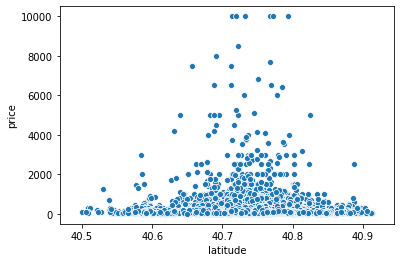

In [21]:
#scatter plot : to check relation between independent variable and target
#here input variable : latitude and target=price
sns.scatterplot(df["latitude"],df["price"])
plt.show()

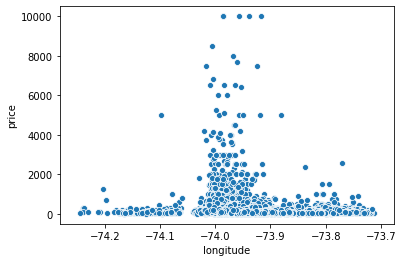

In [22]:
#here input variable : longitude and target=price
sns.scatterplot(df["longitude"],df["price"])
plt.show()

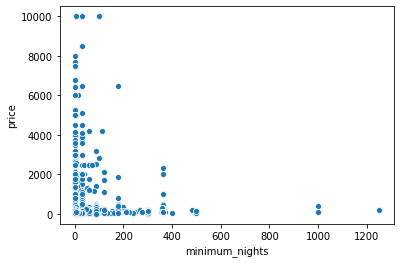

In [23]:
#here input variable : minimum_nights and target=price
sns.scatterplot(df["minimum_nights"],df["price"])
plt.show()

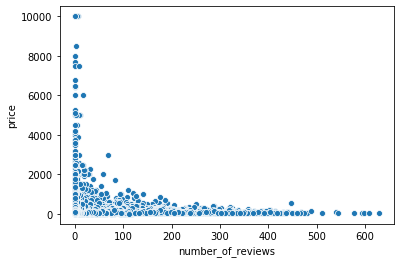

In [24]:
#here input variable : number_of_reviews and target=price
sns.scatterplot(df["number_of_reviews"],df["price"])
plt.show()

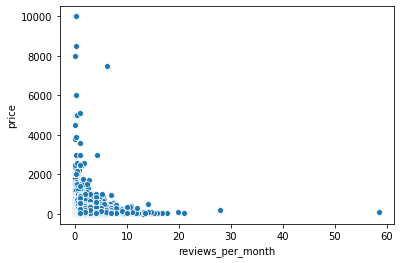

In [25]:
#here input variable : reviews_per_month and target=price
sns.scatterplot(df["reviews_per_month"],df["price"])
plt.show()

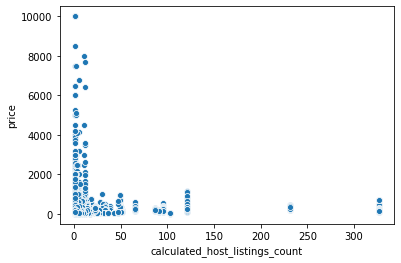

In [26]:
#here input variable : calculated_host_listings_count and target=price
sns.scatterplot(df["calculated_host_listings_count"],df["price"])
plt.show()

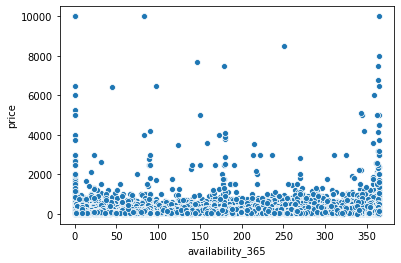

In [27]:
#here input variable : availability_365 and target=price
sns.scatterplot(df["availability_365"],df["price"])
plt.show()

In [28]:
#Removing unwanted features for the module
df.drop(['host_name','name','last_review','latitude','longitude'], axis = 1,inplace=True) 


In [29]:
corre=df.corr()
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


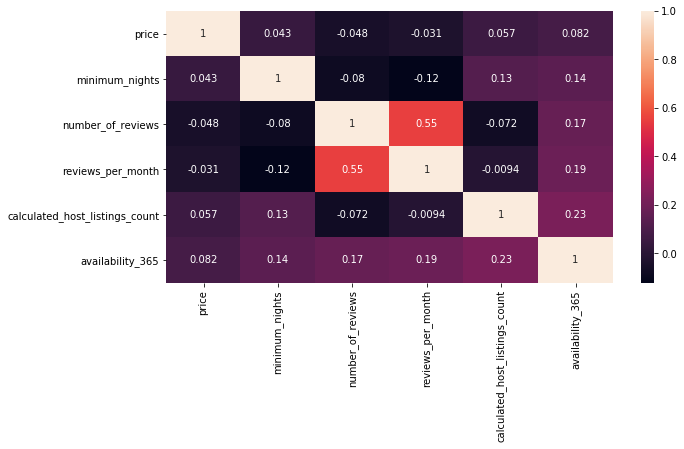

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(corre,annot=True)

In [31]:
# Creating dummy variable of categorical variables for creating regression model
df_1 = pd.get_dummies(df, columns=['neighbourhood_group',"neighbourhood","room_type"], prefix = ['NG',"N","R"],drop_first=True)


In [32]:
# making sure that the columns are according to the required number
df_1.shape

(48895, 232)

In [33]:
# Separating target column
x= df_1.loc[:, df_1.columns != 'price']
y= df_1["price"]

In [34]:
x.shape

(48895, 231)

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=200)
x_train.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,NG_Brooklyn,NG_Manhattan,NG_Queens,NG_Staten Island,N_Arden Heights,...,N_Williamsbridge,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Private room,R_Shared room
7625,1,24,0.47,2,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22341,2,18,0.65,1,95,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15704,1,0,NaN,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10803,30,1,0.04,121,273,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,4,7,0.10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Linear regression model
LR = LinearRegression().fit(x_train, y_train)
y_pred_L = LR.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
LR = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
print('Coefficients: \n', LR.coef_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:{:.5f}'.format(mean_squared_error(y_test, y_pred)))

In [ ]:
print('Coefficient of determination: {:.5f}'.format(r2_score(y_test, y_pred_L)))

In [ ]:
#Ridge regression
Rg= Ridge()
Rg.fit(x_train, y_train)

y_pred_R=Rg.predict(x_test)

In [ ]:
print('Coefficients: \n', Rg.coef_)

In [ ]:
print('Mean squared error: {:.5f}'.format(mean_squared_error(y_test, y_pred_R)))

In [ ]:
print('Coefficient of determination:{:.5f}'.format(r2_score(y_test, y_pred_R)))

In [ ]:
#Lasso regression
Lo = Lasso(alpha=10,max_iter = 10000)
Lo.fit(x_train, y_train)
y_pred_L=Lo.predict(x_test)

In [ ]:
print('Coefficients: \n', Lo.coef_)

In [ ]:
print('Mean squared error: {:.5f}'.format(mean_squared_error(y_test, y_pred_L)))

In [ ]:
print('Coefficient of determination: {:.5f}'.format(r2_score(y_test, y_pred_L)))

In [ ]:
print('Cross validation score of linear regression ={:.5f} '.format(cross_val_score(LR, x, y, cv = 10).mean()))
print('Cross validation score of ridge regression = {:.5f}'.format(cross_val_score(Rg, x, y, cv = 10).mean()))
print('Cross validation score of lasso regression = {:.5f}'.format(cross_val_score(Lo, x, y, cv = 10).mean()))